In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 

In [18]:
import pandas as pd 
data = pd.read_csv("heart.csv")

In [22]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [23]:
df['target'] =data.target

In [24]:
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
df.groupby(["target"]).count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265
1,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304


In [26]:
d =df
X =d.drop(["target"], axis =1)
y=d.target

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X =pd.DataFrame(scaler.fit_transform(X), columns =X.columns)

In [28]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [29]:
from sklearn.decomposition import PCA
pca= PCA(n_components = 4)
X =pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


In [30]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [31]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed =123
train_features, test_features, train_labels, test_labels = train_test_split(X, y, train_size=0.8, random_state=algorithm_globals.random_seed)

In [32]:
from sklearn.svm import SVC
classical_kernels = ['rbf', 'linear', 'poly', 'sigmoid']

start =time.time()
for kernel in classical_kernels:
    classical_svc = SVC(kernel= kernel)
    classical_svc.fit(train_features, train_labels)
    classical_score = classical_svc.score(test_features, test_labels)
    
    print(f'{kernel} kernel classification test score:  {classical_score: .2f}')

elapsed = time.time() -start
print(f"Training and testing time: {elapsed} seconds")
      

rbf kernel classification test score:   0.46
linear kernel classification test score:   0.46
poly kernel classification test score:   0.46
sigmoid kernel classification test score:   0.46
Training and testing time: 0.11075711250305176 seconds


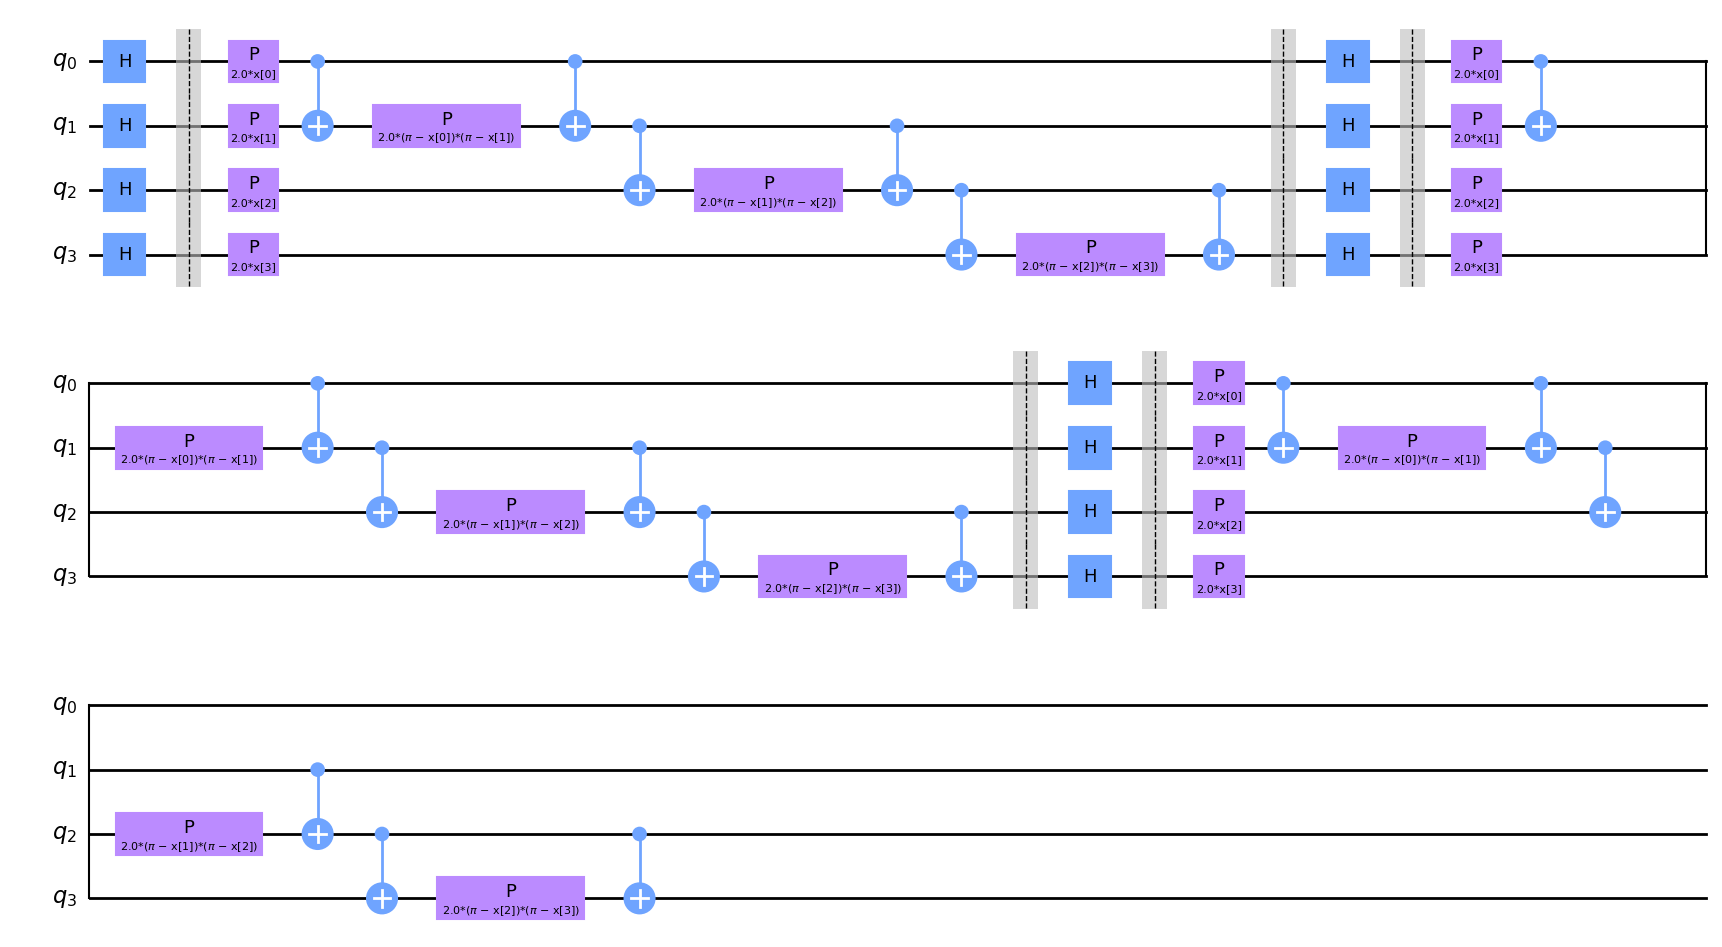

In [33]:
from qiskit.circuit.library import ZZFeatureMap

num_features = train_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=3, entanglement = 'linear',
insert_barriers =True)
feature_map.decompose().draw(output='mpl')

In [34]:
from qiskit import Aer, execute
backend = Aer.get_backend("qasm_simulator")

In [35]:
from qiskit_machine_learning.kernels import QuantumKernel
qunatum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

In [36]:
quantum_svc = SVC(kernel=qunatum_kernel.evaluate)

quantum_svc.fit(train_features, train_labels)
quantum_score = quantum_svc.score(test_features, test_labels)

print(f" Callable quantum kernel classification test score: {quantum_score}")

 Callable quantum kernel classification test score: 0.5
